In [0]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_v2.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg19.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_simple.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/helper.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/metrics.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/trainer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/visualizer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/saving_pretrain.py

--2019-03-23 23:17:32--  https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py [following]
--2019-03-23 23:17:33--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.184.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.184.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1762 (1.7K) [text/plain]
Saving to: ‘data_loader.py’

data_loader.py      100%[===================>]   1.72K  --.-KB/s    in 0s      

2019-03-23 23:17:33 (153 MB/s) - ‘data_loader.py’ saved [1762/1762]

--2019-03-23 23:17:33--  https://github.com

HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/visualizer.py [following]
--2019-03-23 23:17:37--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/visualizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.184.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.184.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3385 (3.3K) [text/plain]
Saving to: ‘visualizer.py’

visualizer.py       100%[===================>]   3.31K  --.-KB/s    in 0s      

2019-03-23 23:17:37 (41.9 MB/s) - ‘visualizer.py’ saved [3385/3385]

--2019-03-23 23:17:37--  https://github.com/MNRKhan/aps360-project/raw/master/modules/saving_pretrain.py
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 30

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

from helper import *
from visualizer import *
from metrics import *
from extractNet_simple import *
from extractNet_connected import *
from extractNet_connected_vgg19 import *
from trainer import *
from data_loader import *
from saving_pretrain import *

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip

In [23]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person.zip

--2019-03-24 04:38:08--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/train2014/data_person.zip [following]
--2019-03-24 04:38:08--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/train2014/data_person.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50485458 (48M) [application/zip]
Saving to: ‘data_person.zip’

data_person.zip     100%[===================>]  48.15M   129MB/s    in 0.4s    

2019-03-24 04:38:09 (129 MB/s) - 

In [0]:
!rm -rf ./data
!unzip data_person.zip

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip

In [0]:
batch_size = 64
lr = 0.001

In [0]:
# Set random seeds

torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset

transform = transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/content/data", transform)

# Dataset sizes

size = len(dataset)
   
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

# Splitting datasets
  
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader

train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=0)

print("Size of dataset:", size)

In [0]:
# Empty cache

torch.cuda.empty_cache()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = extractNet_connected_vgg19()
#net.to(device)

print("Model is being trained on:", device)

Model is being trained on: cuda:0


In [0]:
trainModel(net, train, valid, batch_size=batch_size, lr=lr, num_epochs=100, checkpoint=False, device=device)

In [0]:
path = "layers_epoch_300"
net = load_state_from_dc(net, path)

In [30]:
!rm -rf /content/data
!unzip resized.zip

Archive:  resized.zip
   creating: resized/
  inflating: resized/002.jpg         
  inflating: resized/003.jpg         
  inflating: resized/001.jpg         
  inflating: resized/004.jpg         
  inflating: resized/005.jpg         
  inflating: resized/007.jpg         
  inflating: resized/006.jpg         
  inflating: resized/008.jpg         
  inflating: resized/009.jpg         


<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


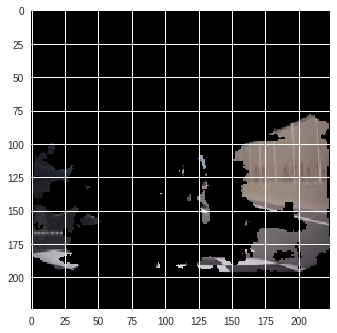

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


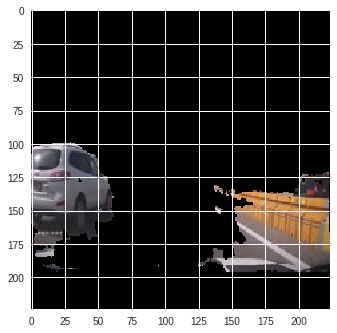

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


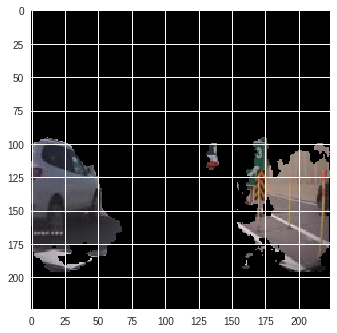

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


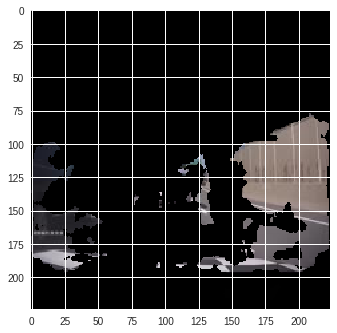

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


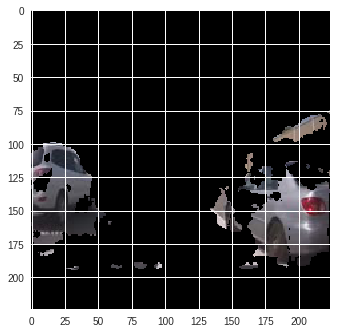

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


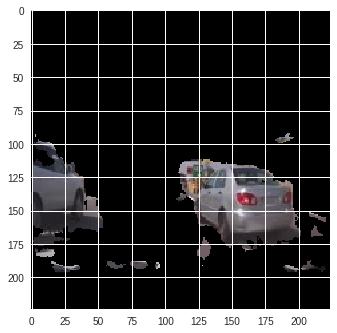

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


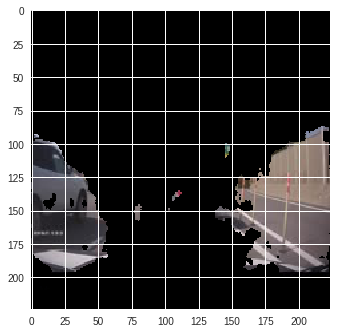

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


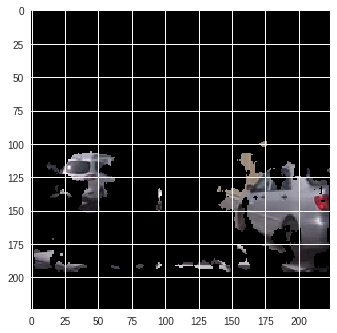

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
out torch.Size([1, 512, 14, 14])
encode torch.Size([1, 512, 14, 14])


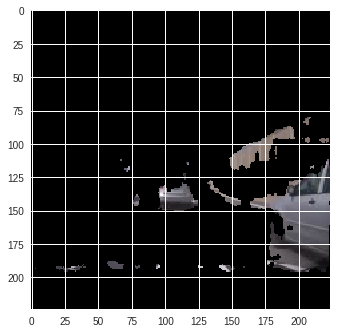

In [33]:
import scipy.misc

net.to("cpu")

path = '/content/resized'
folder = os.fsencode(path)

transform = transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

for file in os.listdir(folder):
  
    filename = os.fsdecode(file)
        
    original = plt.imread("/content/resized/" + filename)
    img = transform(original).unsqueeze(0)
    
    print(type(img))
    print(img.shape)
    
    result = torch.sigmoid(net(img))
    result = thresholdProbMask(result.squeeze(0).squeeze(0).detach()) 
    result = np.expand_dims(result, axis=-1)
    
    final = (result * original).astype(int)
    scipy.misc.imsave('/content/segmented/' + filename, final)
    
    plt.imshow(final)
    plt.show()

In [36]:
!zip -r segmented.zip segmented

  adding: segmented/ (stored 0%)
  adding: segmented/002.jpg (deflated 11%)
  adding: segmented/009.jpg (deflated 14%)
  adding: segmented/008.jpg (deflated 12%)
  adding: segmented/001.jpg (deflated 9%)
  adding: segmented/005.jpg (deflated 11%)
  adding: segmented/006.jpg (deflated 12%)
  adding: segmented/007.jpg (deflated 12%)
  adding: segmented/004.jpg (deflated 11%)
  adding: segmented/003.jpg (deflated 14%)


In [12]:
# After training

net.to("cpu")

img, target = valid_data[1]

original = img.permute(1, 2, 0).detach().numpy()
plt.imshow(original)
plt.show()

out = net(img.unsqueeze(0))
out = out.squeeze(0).squeeze(0).detach().numpy()

target = target.squeeze(0).detach().numpy()

#plt.imshow(target)
#plt.show()
#plt.imshow(out)
#plt.show()

result = torch.sigmoid(net(img.unsqueeze(0)))
result = thresholdProbMask(result.squeeze(0).squeeze(0).detach())

plt.imshow(result)
plt.show()

result = np.expand_dims(result, axis=-1)
final = result * original

plt.imshow(final)
plt.show()

denoised = denoise(final)

plt.imshow(denoised)
plt.show()

NameError: ignored